###Red Wine Quality Prediction Project
Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
print("Row , Columns : ",df.shape)
df.head()

Row , Columns :  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


                    Description of the features
1. Alcohol: the amount of alcohol in wine
2. Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
5. Total Sulfur Dioxide: is the amount of free + bound forms of SO2
6. Density: sweeter wines have a higher density
7. Chlorides: the amount of salt in the wine
8. Fixed acidity: are non-volatile acids that do not evaporate readily
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
11. Residual sugar: is the amount of sugar remaining after fermentation stops.The key is to have a perfect balance between — sweetness and sourness (wines > 45g/ltrs are sweet)
12. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7).

                                Objectives 
1. ML modelling with different classification algorithm to build model with highest accuracy which in turns lead to predicting quality of wine in term of good or not good.
2. With help of EDA to determine which features are the most indicative of a good quality wine


# Statistical summary

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Mean feature values as per different quality grade
means=pd.pivot_table(data=df,index='quality',aggfunc={'fixed acidity':np.mean,'volatile acidity':np.mean,'citric acid':np.mean,'residual sugar':np.mean,'chlorides':np.mean,'free sulfur dioxide':np.mean,'density':np.mean,'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
means

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
quality,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,0.423333


                         Based on mean values
1. The data for alcohol, sulphates, and citric acid for wines with a quality rating of 8 is as follows:
-Alcohol: 12.094444
-Sulphates: 0.767778
-Citric Acid: 0.391111

2. For wines with a quality rating of 3, the data for citric acid, free sulfur dioxide, and sulphates is as follows:
Citric Acid: 0.171000
Free Sulfur Dioxide: 11.000000
Sulphates: 0.570000
 
3. Density and residual sugar are not deciding factor in determining quality of wine

# We will create two class for purpose of classification based on quality grade of red wine
    class 1- Good quality red wine - if a quality grade of 7 or higher
    class 0- Low quality red wine - if a quality grade less than 7

In [125]:
df['Quality Class']=df['quality'].apply(lambda x: 1 if x>=7 else 0 )

In [132]:
df['Quality Class'].value_counts()

0    1382
1     217
Name: Quality Class, dtype: int64

In [127]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [128]:
df1=df.drop(columns='quality')

In [129]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [130]:
means=pd.pivot_table(data=df,index='Quality Class',aggfunc={'fixed acidity':np.mean,'volatile acidity':np.mean,'citric acid':np.mean,'residual sugar':np.mean,'chlorides':np.mean,'free sulfur dioxide':np.mean,'density':np.mean,'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
means

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
Quality Class,,,,,,,,,,
0,10.251037,0.089281,0.254407,0.996859,8.236831,16.172214,3.314616,2.512120,0.644754,0.547022
1,11.518049,0.075912,0.376498,0.996030,8.847005,13.981567,3.288802,2.708756,0.743456,0.405530


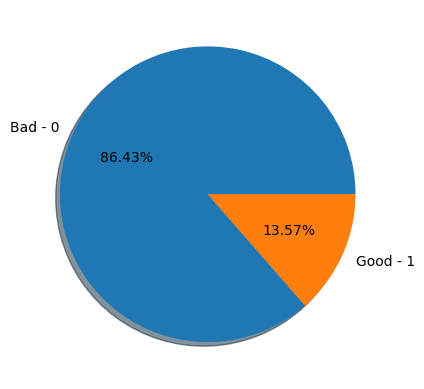

In [133]:
labels = 'Bad - 0','Good - 1',
fig, ax = plt.subplots()
ax.pie(df['Quality Class'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()

<Axes: >

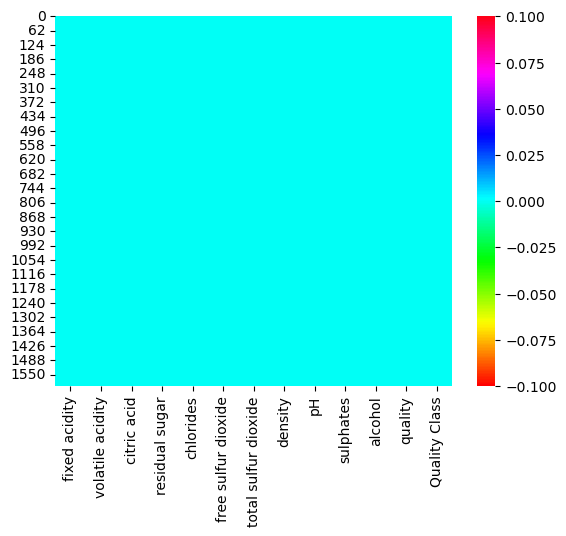

In [134]:
#checking Null value or missing data
sns.heatmap(df.isnull() ,cmap='hsv')

In [135]:
#There is no null value present in this DataFrame so lets move forward

# EDA (Exploratory Data Analysis)

<Axes: xlabel='quality', ylabel='count'>

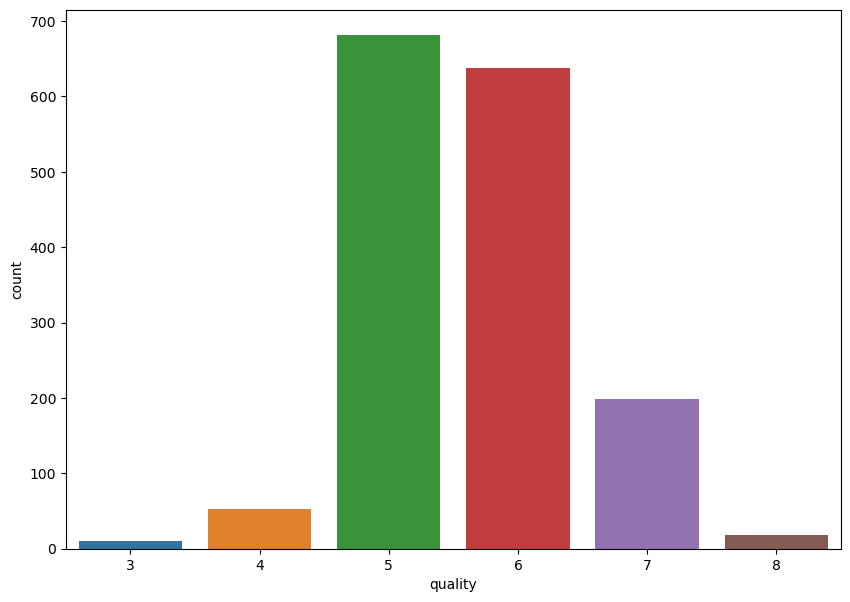

In [136]:
plt.figure(figsize =(10, 7))
sns.countplot(data=df,x=df['quality'])

In [137]:
valuequality=df['quality'].value_counts()


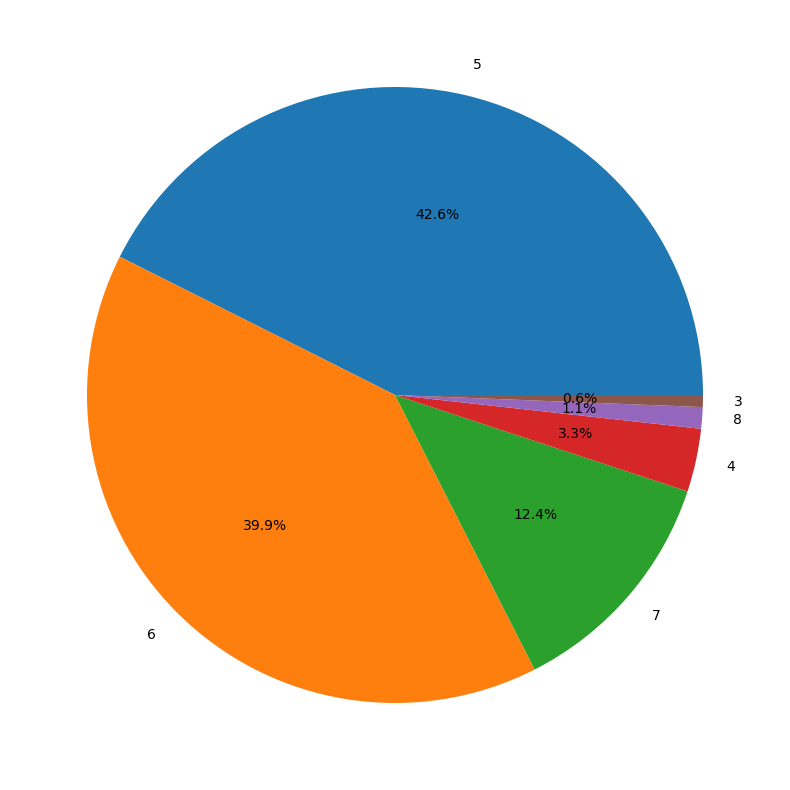

In [138]:
plt.figure(figsize=(10,10))
labels = '5','6','7','4','8','3'
plt.pie(valuequality , autopct='%1.1f%%' , labels=labels)
plt.show()

#### Comment -
1. Majority of wine samples are of quality level 5 and 6.
2. This dataset we have only 217 wine sample with higher quality grade.

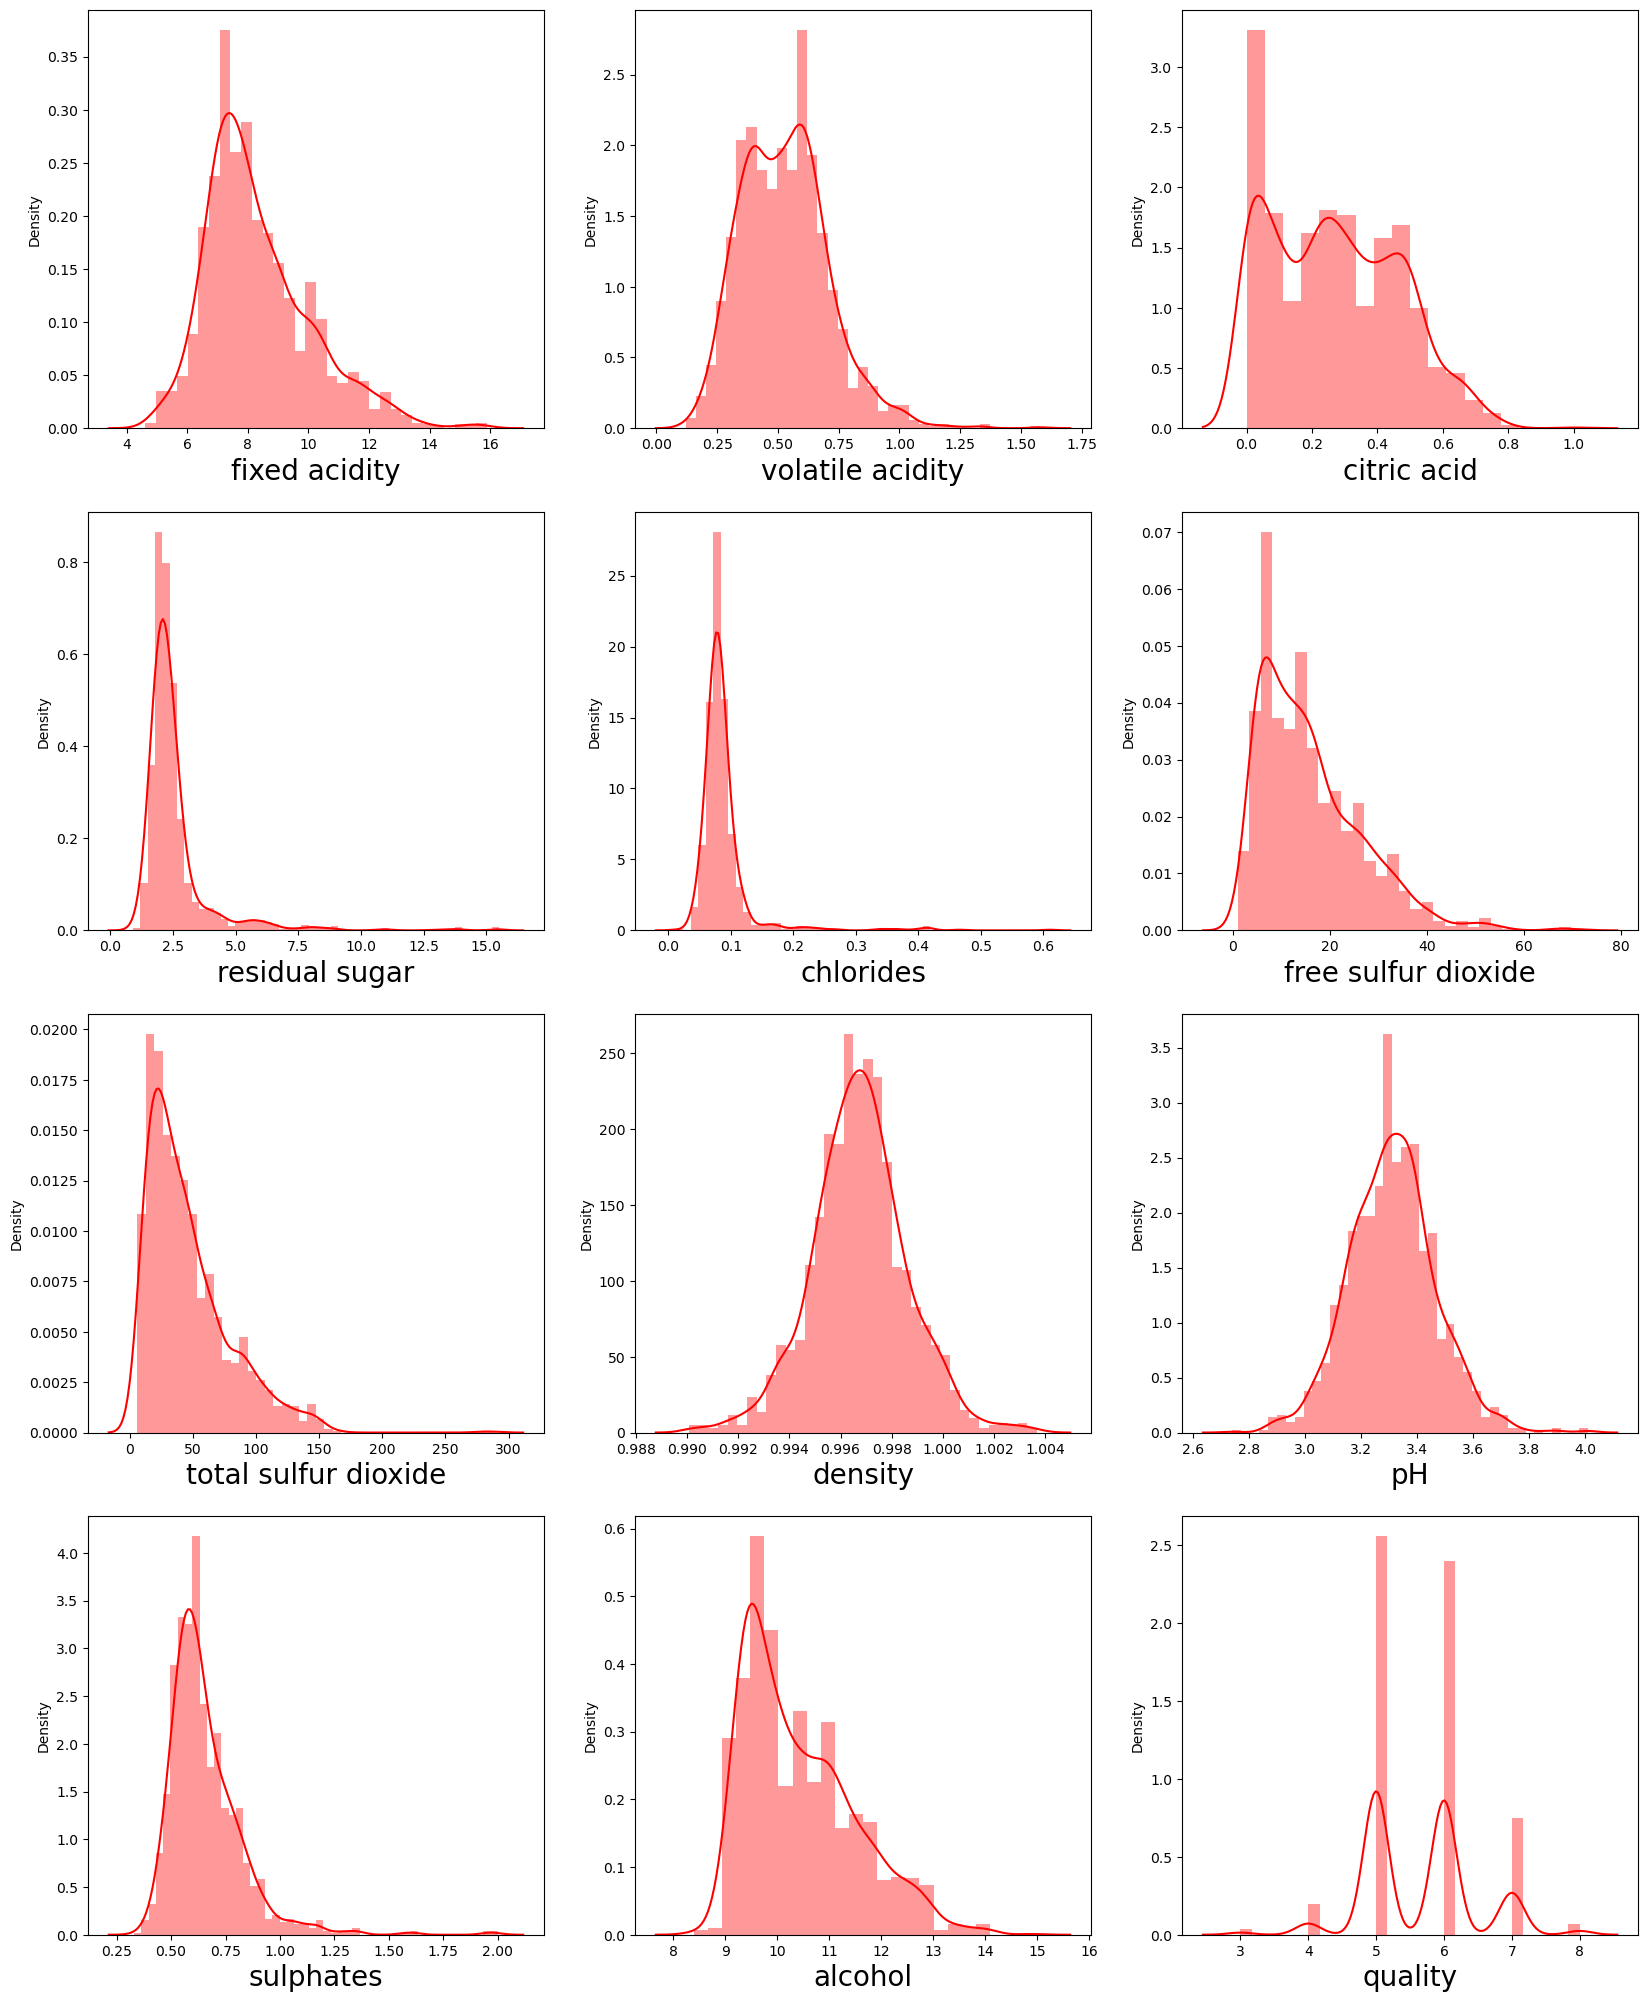

In [139]:
#Distribution of features
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### Skewness in Data -
There is skewness in data

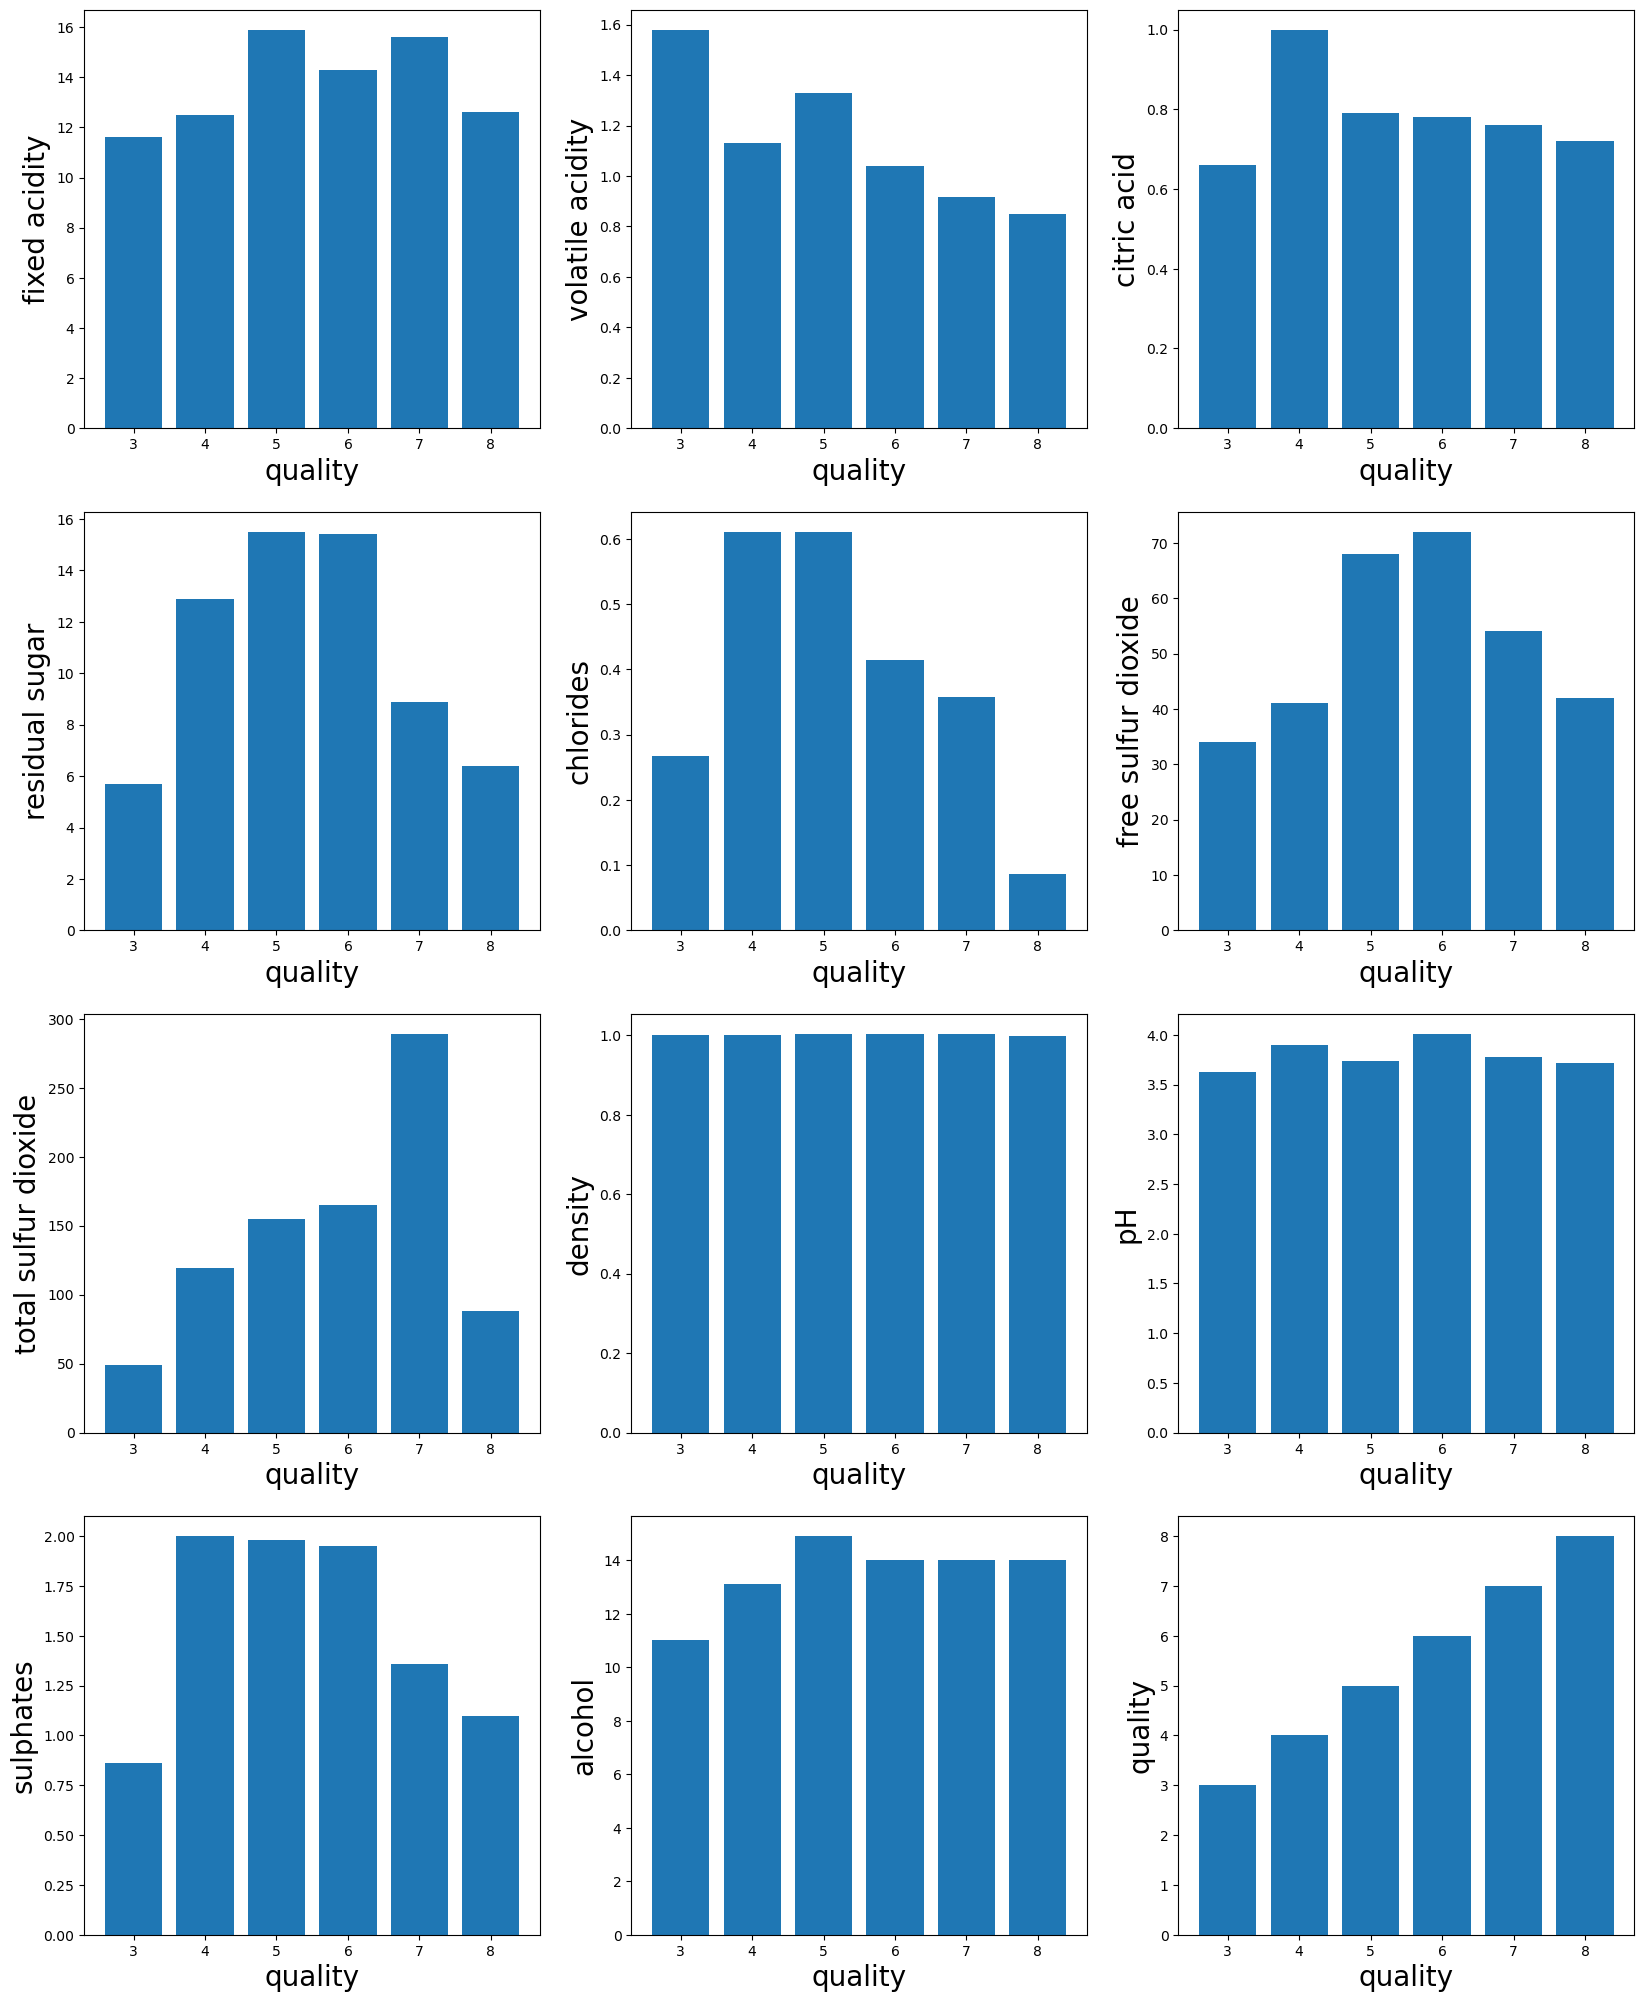

In [140]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        plt.bar(df['quality'],df[column])
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()
        

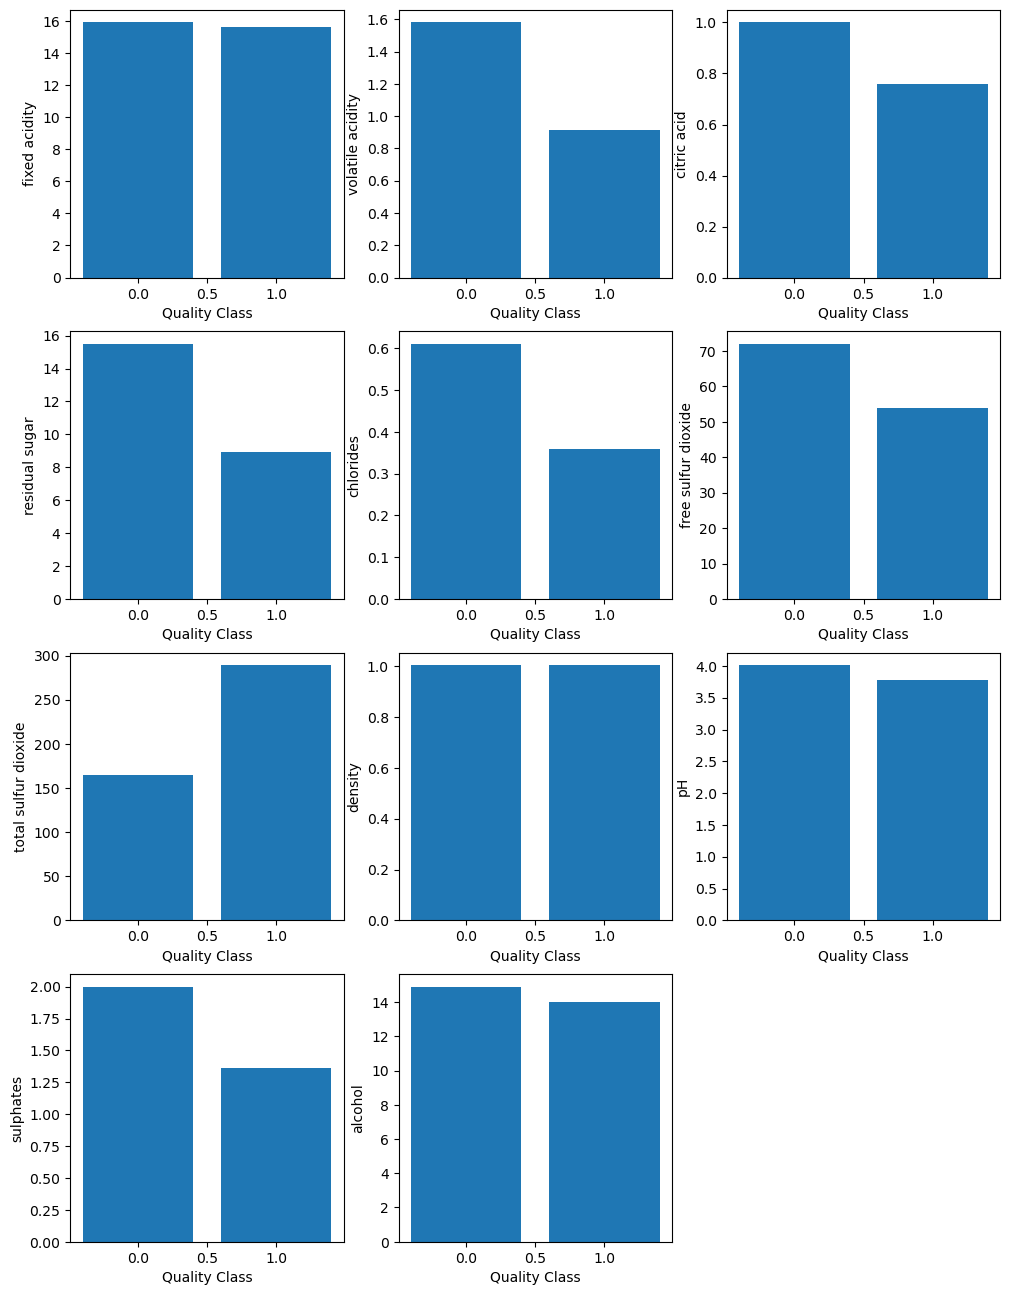

In [141]:
#Classify on the base of the quality class
plt.figure(figsize=(12,16))
plotnumber=1
for column in df1:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        plt.bar(df1['Quality Class'],df1[column])
        plt.xlabel('Quality Class')
        plt.ylabel(column)
    plotnumber+=1
plt.show()

#### Comment - 
1. Quality of wine increase with increase in alcohol, sulpates, residual sugar, citric acid,fixed acidity.
2. Quality of wine decreses with increase in total sulfur dioxide,chlorides, volatile acidity,free sulfur dioxide.

In [142]:
grp=df.groupby('Quality Class')
g1=grp.get_group(0)
g2=grp.get_group(1)

In [143]:
#This Group having Good Quality 
g1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [144]:
#This Group having Bad Quality
g2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality Class
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7,1


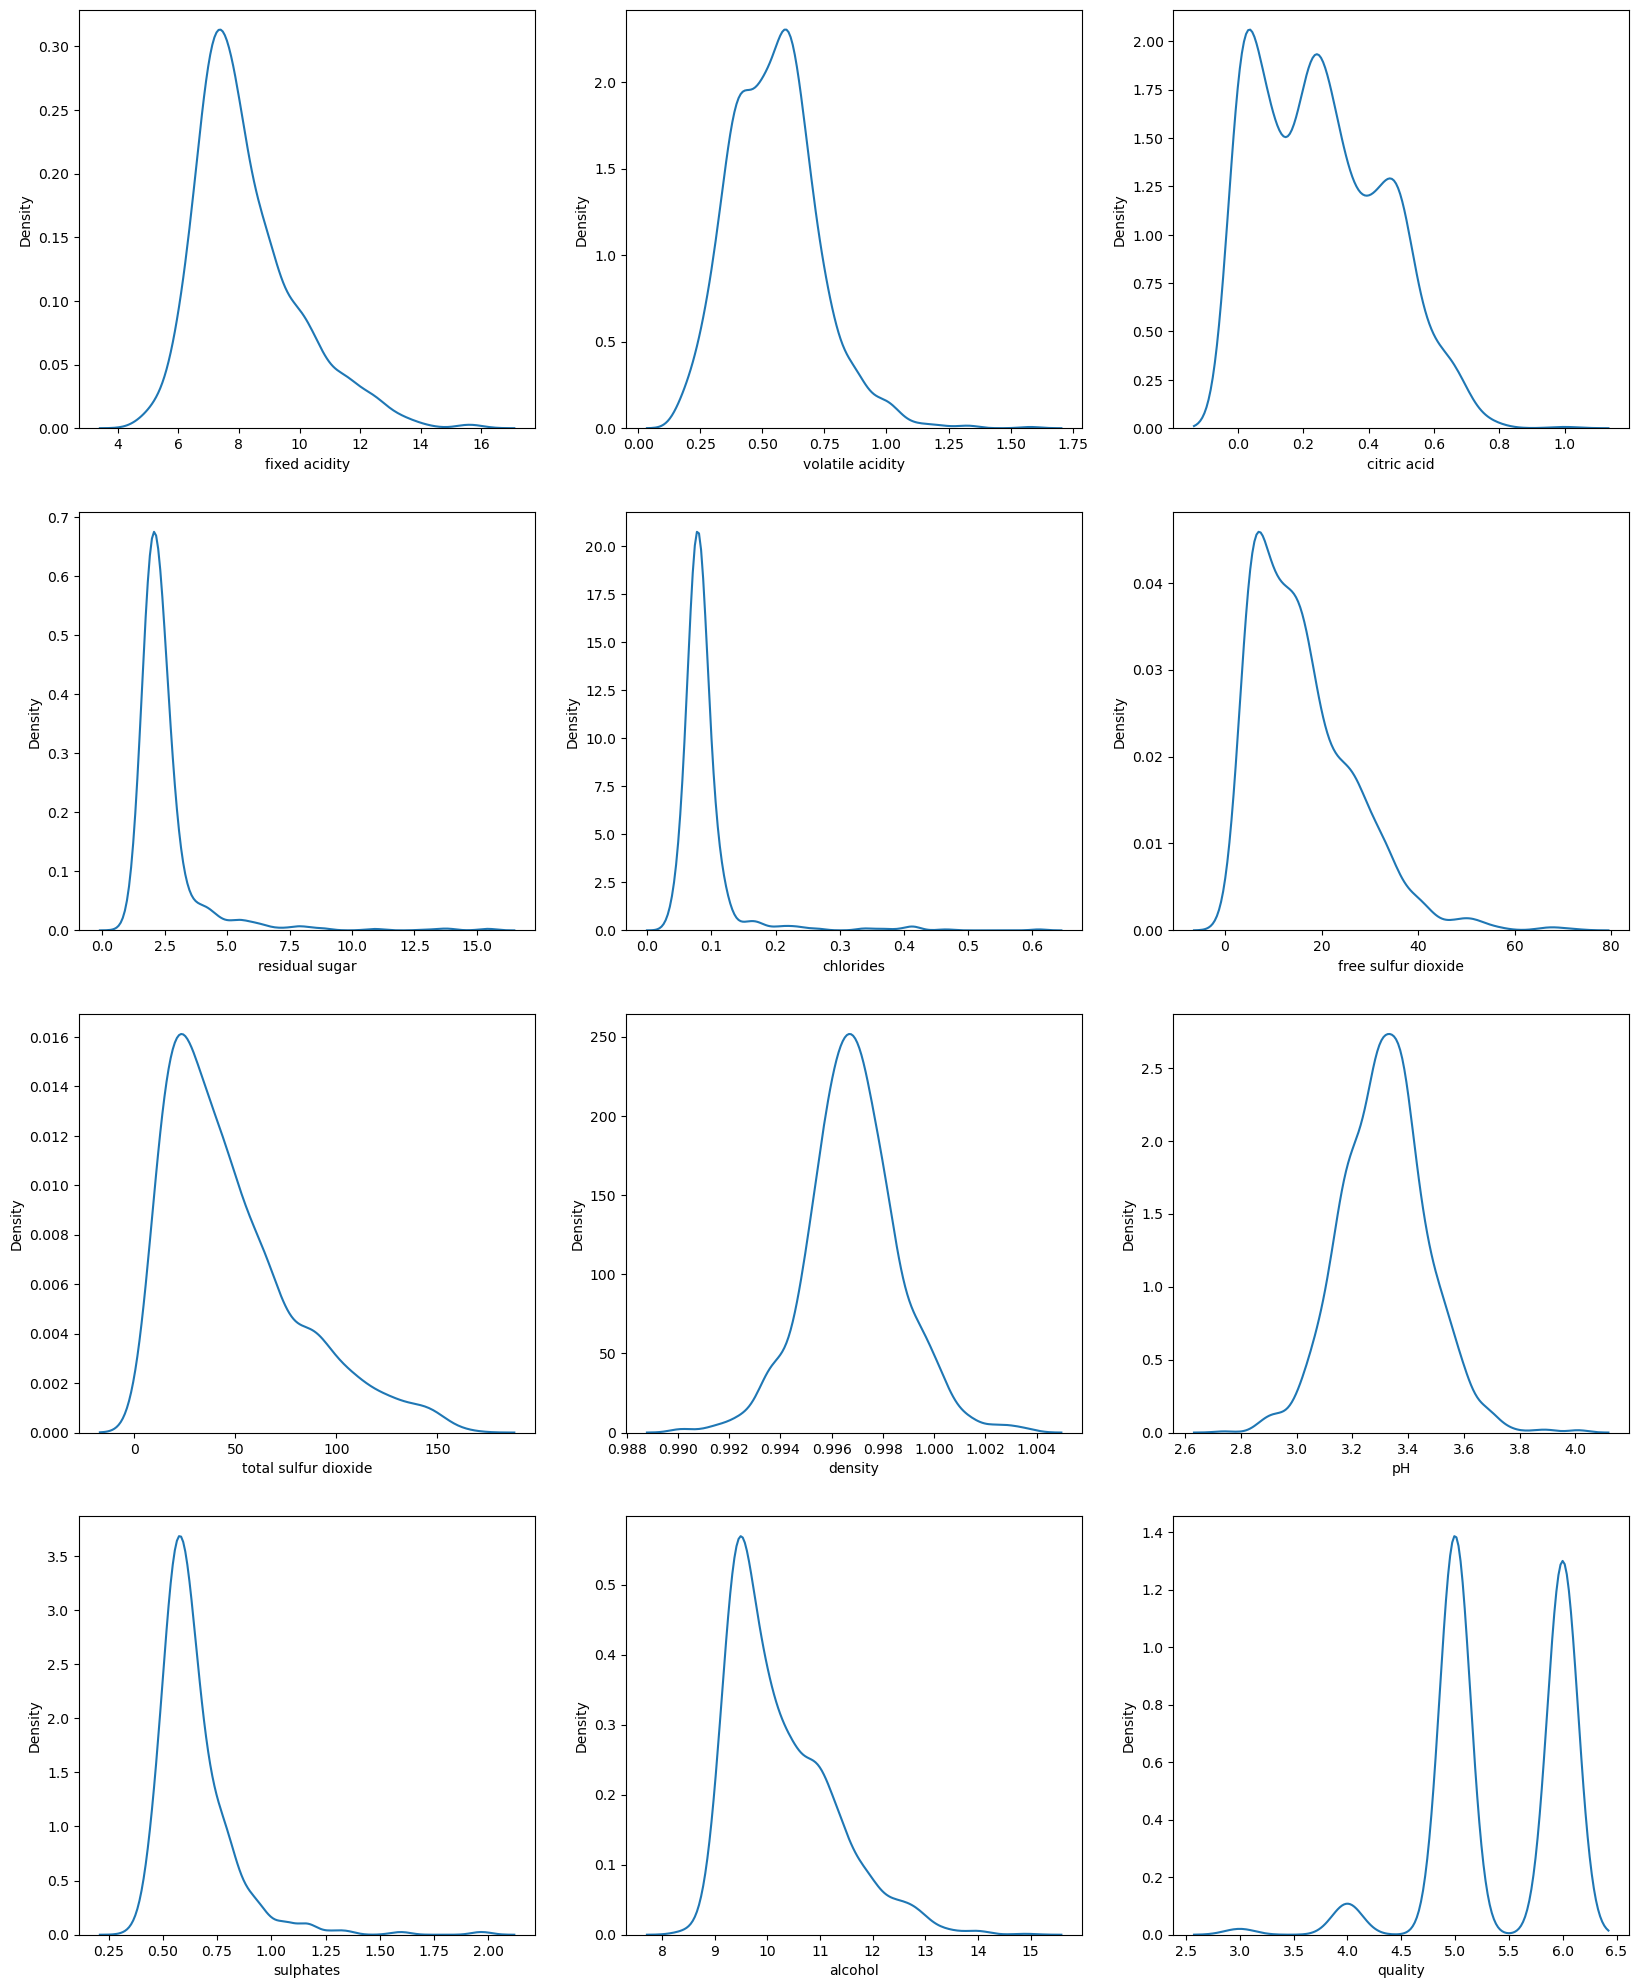

In [145]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in g1:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.kdeplot(g1[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

# Feature Selection 
### Outliers Detection based in IQR

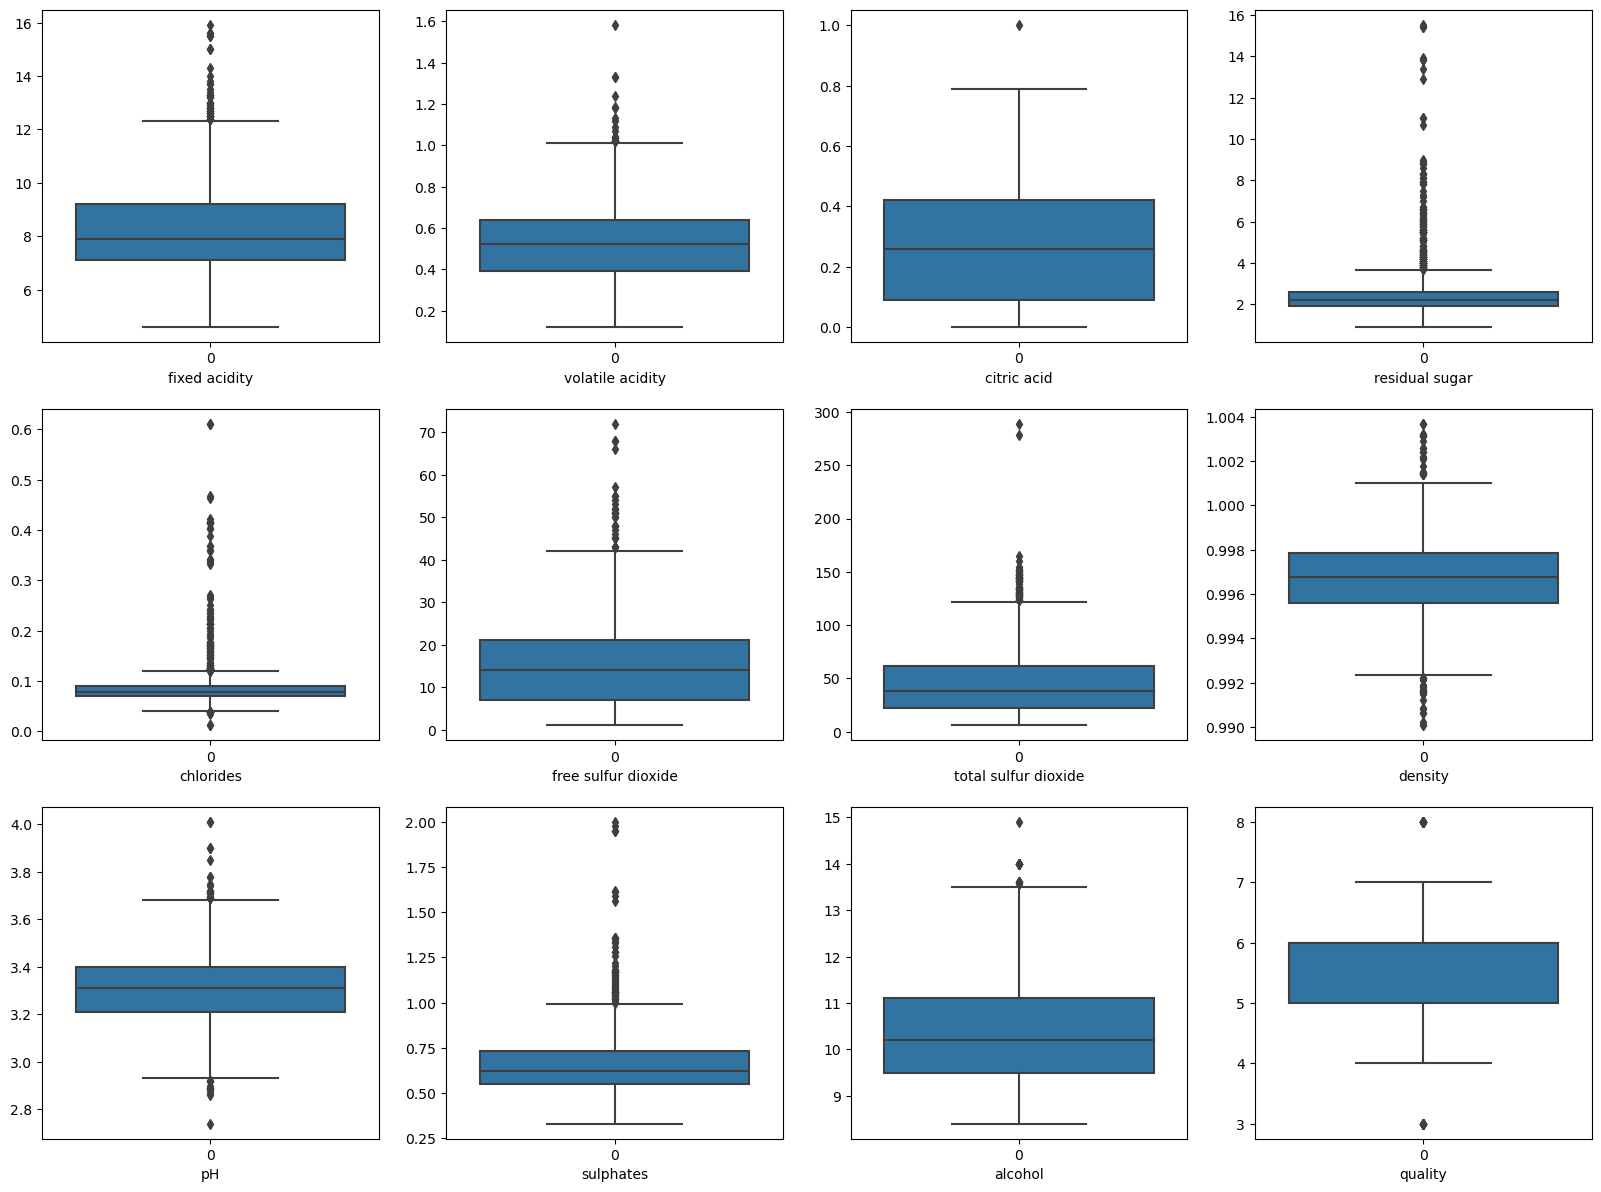

In [146]:
plt.figure(figsize=(20,25))
p=1
for i in dfl:
    if p<=12:
        plt.subplot(5,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1
    
plt.show()

In [147]:
df2 =df1.copy()
Q1 =df2.quantile(0.25)
Q3= df2.quantile(0.75)
IQR = Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
Quality Class            0.000000
dtype: float64


In [148]:
df_new =df2[~((df <(Q1 - 1.5*IQR)) | (df >(Q3 + 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(1047, 12)


In [149]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1599-1047)/1599)*100,'%')

Percentage Data Loss : 34.52157598499062 %


There is significant data loss  with IQR method.

### Using Zscore 

In [150]:
from scipy.stats import zscore
df3=df1.copy()
z_score = zscore(df3)
z_score_abs = np.abs(z_score)
df_new= df3[(z_score_abs < 3).all(axis=1)]
df_new.shape

(1458, 12)

In [151]:
print("Old DataFrame : ",dfl.shape[0])
print("New DataFrame : ",dfclean.shape[0])

Old DataFrame :  1599
New DataFrame :  1451


In [152]:
print("Data Loss Percentage : ",((df3.shape[0]-df_new.shape[0])/df3.shape[0])*100,'%')

Data Loss Percentage :  8.818011257035648 %


# Checking for skewness

In [153]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
Quality Class           2.103030
dtype: float64

In [162]:
from scipy.stats import boxcox

In [163]:
df_new['fixed acidity']=boxcox(df_new['fixed acidity'],0)
df_new['residual sugar']=boxcox(df_new['residual sugar'],-1)
df_new['chlorides']=boxcox(df_new['chlorides'],-0.5)
df_new['free sulfur dioxide']=boxcox(df_new['free sulfur dioxide'],0)
df_new['total sulfur dioxide']=boxcox(df_new['total sulfur dioxide'],0)
df_new['sulphates']=boxcox(df_new['sulphates'],0)
df_new['alcohol']=boxcox(df_new['alcohol'],-0.5)

In [164]:
df_new.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.129444
chlorides              -0.174196
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.508422
Quality Class           2.103030
dtype: float64

In [165]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df_new.columns:
    if df_new[i].dtypes=='object':
        df_new[i]=OE.fit_transform(df_new[i].values.reshape(-1,1))
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality Class
0,2.001480,0.700,0.00,0.473684,-5.254763,2.397895,3.526361,0.99780,3.51,-0.579818,1.347672,0
1,2.054124,0.880,0.00,0.615385,-4.388766,3.218876,4.204693,0.99680,3.20,-0.385662,1.361123,0
2,2.054124,0.760,0.04,0.565217,-4.593805,2.708050,3.988984,0.99700,3.26,-0.430783,1.361123,0
3,2.415914,0.280,0.56,0.473684,-5.302967,2.833213,4.094345,0.99800,3.16,-0.544727,1.361123,0
4,2.001480,0.700,0.00,0.473684,-5.254763,2.397895,3.526361,0.99780,3.51,-0.579818,1.347672,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.600,0.08,0.500000,-4.666667,3.465736,3.784190,0.99490,3.45,-0.544727,1.382787,0
1595,1.774952,0.550,0.10,0.545455,-6.032193,3.663562,3.931826,0.99512,3.52,-0.274437,1.402386,0
1596,1.840550,0.510,0.13,0.565217,-5.254763,3.367296,3.688879,0.99574,3.42,-0.287682,1.396977,0
1597,1.774952,0.645,0.12,0.500000,-5.302967,3.465736,3.784190,0.99547,3.57,-0.342490,1.373776,0


In [166]:
dfbackup=df_new.copy()

In [167]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality Class
0,2.001480,0.700,0.00,0.473684,-5.254763,2.397895,3.526361,0.99780,3.51,-0.579818,1.347672,0
1,2.054124,0.880,0.00,0.615385,-4.388766,3.218876,4.204693,0.99680,3.20,-0.385662,1.361123,0
2,2.054124,0.760,0.04,0.565217,-4.593805,2.708050,3.988984,0.99700,3.26,-0.430783,1.361123,0
3,2.415914,0.280,0.56,0.473684,-5.302967,2.833213,4.094345,0.99800,3.16,-0.544727,1.361123,0
4,2.001480,0.700,0.00,0.473684,-5.254763,2.397895,3.526361,0.99780,3.51,-0.579818,1.347672,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.600,0.08,0.500000,-4.666667,3.465736,3.784190,0.99490,3.45,-0.544727,1.382787,0
1595,1.774952,0.550,0.10,0.545455,-6.032193,3.663562,3.931826,0.99512,3.52,-0.274437,1.402386,0
1596,1.840550,0.510,0.13,0.565217,-5.254763,3.367296,3.688879,0.99574,3.42,-0.287682,1.396977,0
1597,1.774952,0.645,0.12,0.500000,-5.302967,3.465736,3.784190,0.99547,3.57,-0.342490,1.373776,0


In [158]:
df_new.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality Class
fixed acidity,1.000000,-0.296566,0.699747,0.175809,0.187853,-0.146702,-0.098843,0.660497,-0.704507,0.200796,-0.018384,0.124746
volatile acidity,-0.296566,1.000000,-0.589286,0.032331,0.070307,0.008824,0.104585,-0.000446,0.252900,-0.350547,-0.212767,-0.268236
citric acid,0.699747,-0.589286,1.000000,0.178784,0.104950,-0.072097,0.007320,0.372338,-0.521270,0.303401,0.164420,0.226809
residual sugar,0.175809,0.032331,0.178784,1.000000,0.121287,-0.005795,0.091381,0.343236,-0.072787,0.071218,0.162423,0.115612
chlorides,0.187853,0.070307,0.104950,0.121287,1.000000,-0.057342,0.040874,0.330104,-0.183105,0.025329,-0.209711,-0.112431
free sulfur dioxide,-0.146702,0.008824,-0.072097,-0.005795,-0.057342,1.000000,0.660348,-0.039334,0.107444,0.059713,-0.076400,-0.085448
total sulfur dioxide,-0.098843,0.104585,0.007320,0.091381,0.040874,0.660348,1.000000,0.116386,-0.007726,-0.037164,-0.257834,-0.171294
density,0.660497,-0.000446,0.372338,0.343236,0.330104,-0.039334,0.116386,1.000000,-0.311217,0.127562,-0.469611,-0.154221
pH,-0.704507,0.252900,-0.521270,-0.072787,-0.183105,0.107444,-0.007726,-0.311217,1.000000,-0.039558,0.136659,-0.079528
sulphates,0.200796,-0.350547,0.303401,0.071218,0.025329,0.059713,-0.037164,0.127562,-0.039558,1.000000,0.240684,0.310206


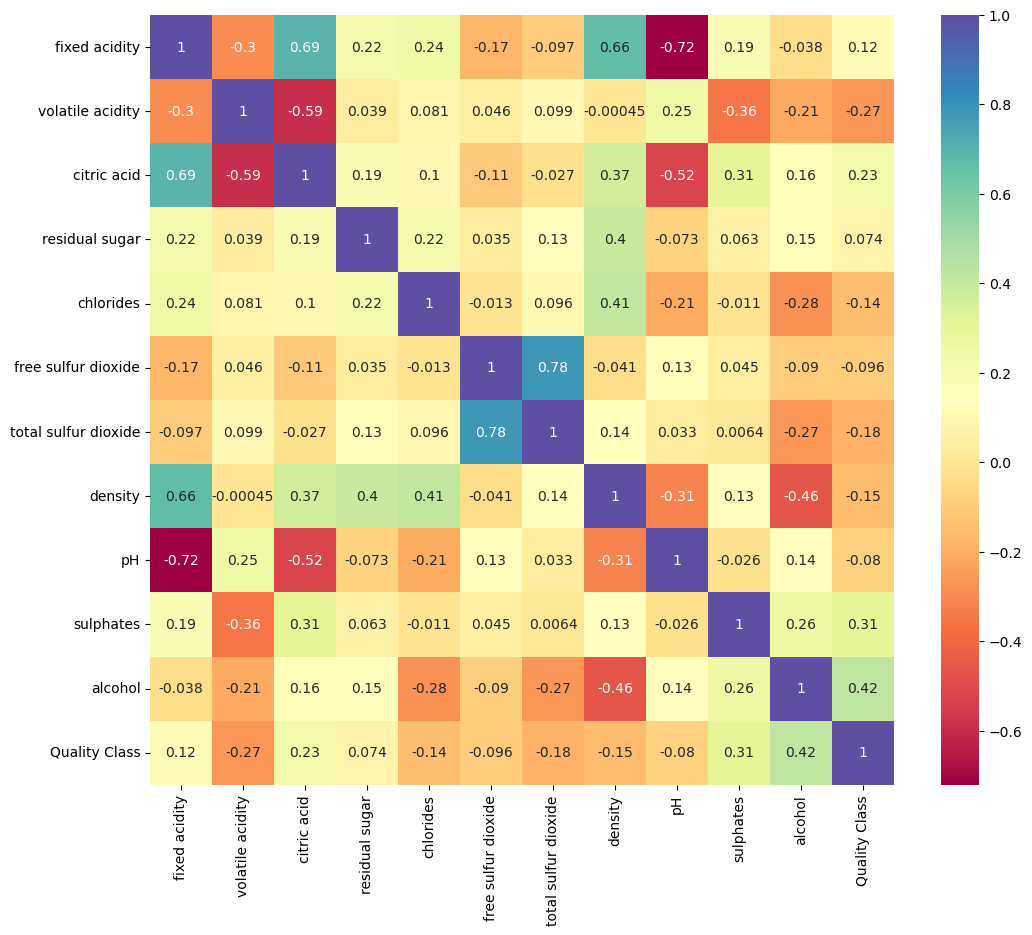

In [168]:
plt.figure(figsize=(12,10))
sns.heatmap(df_new.corr(),cmap='Spectral',annot=True)
plt.show()

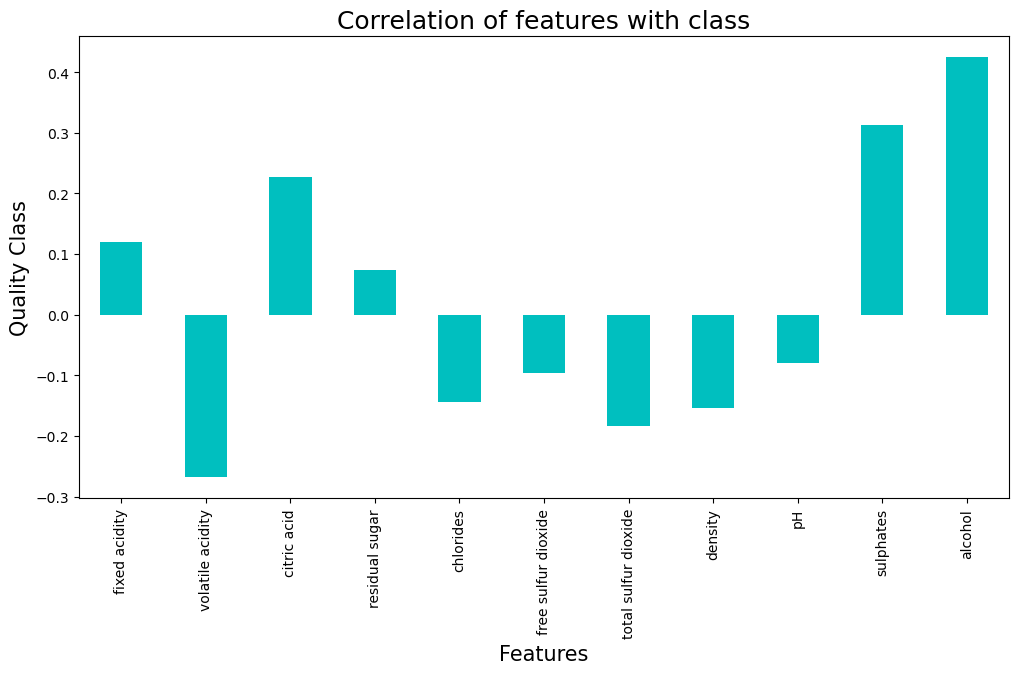

In [169]:
plt.figure(figsize = (12,6))
df_new.corr()['Quality Class'].drop(['Quality Class']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Quality Class',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

## How data distributed by each column in DataFrame

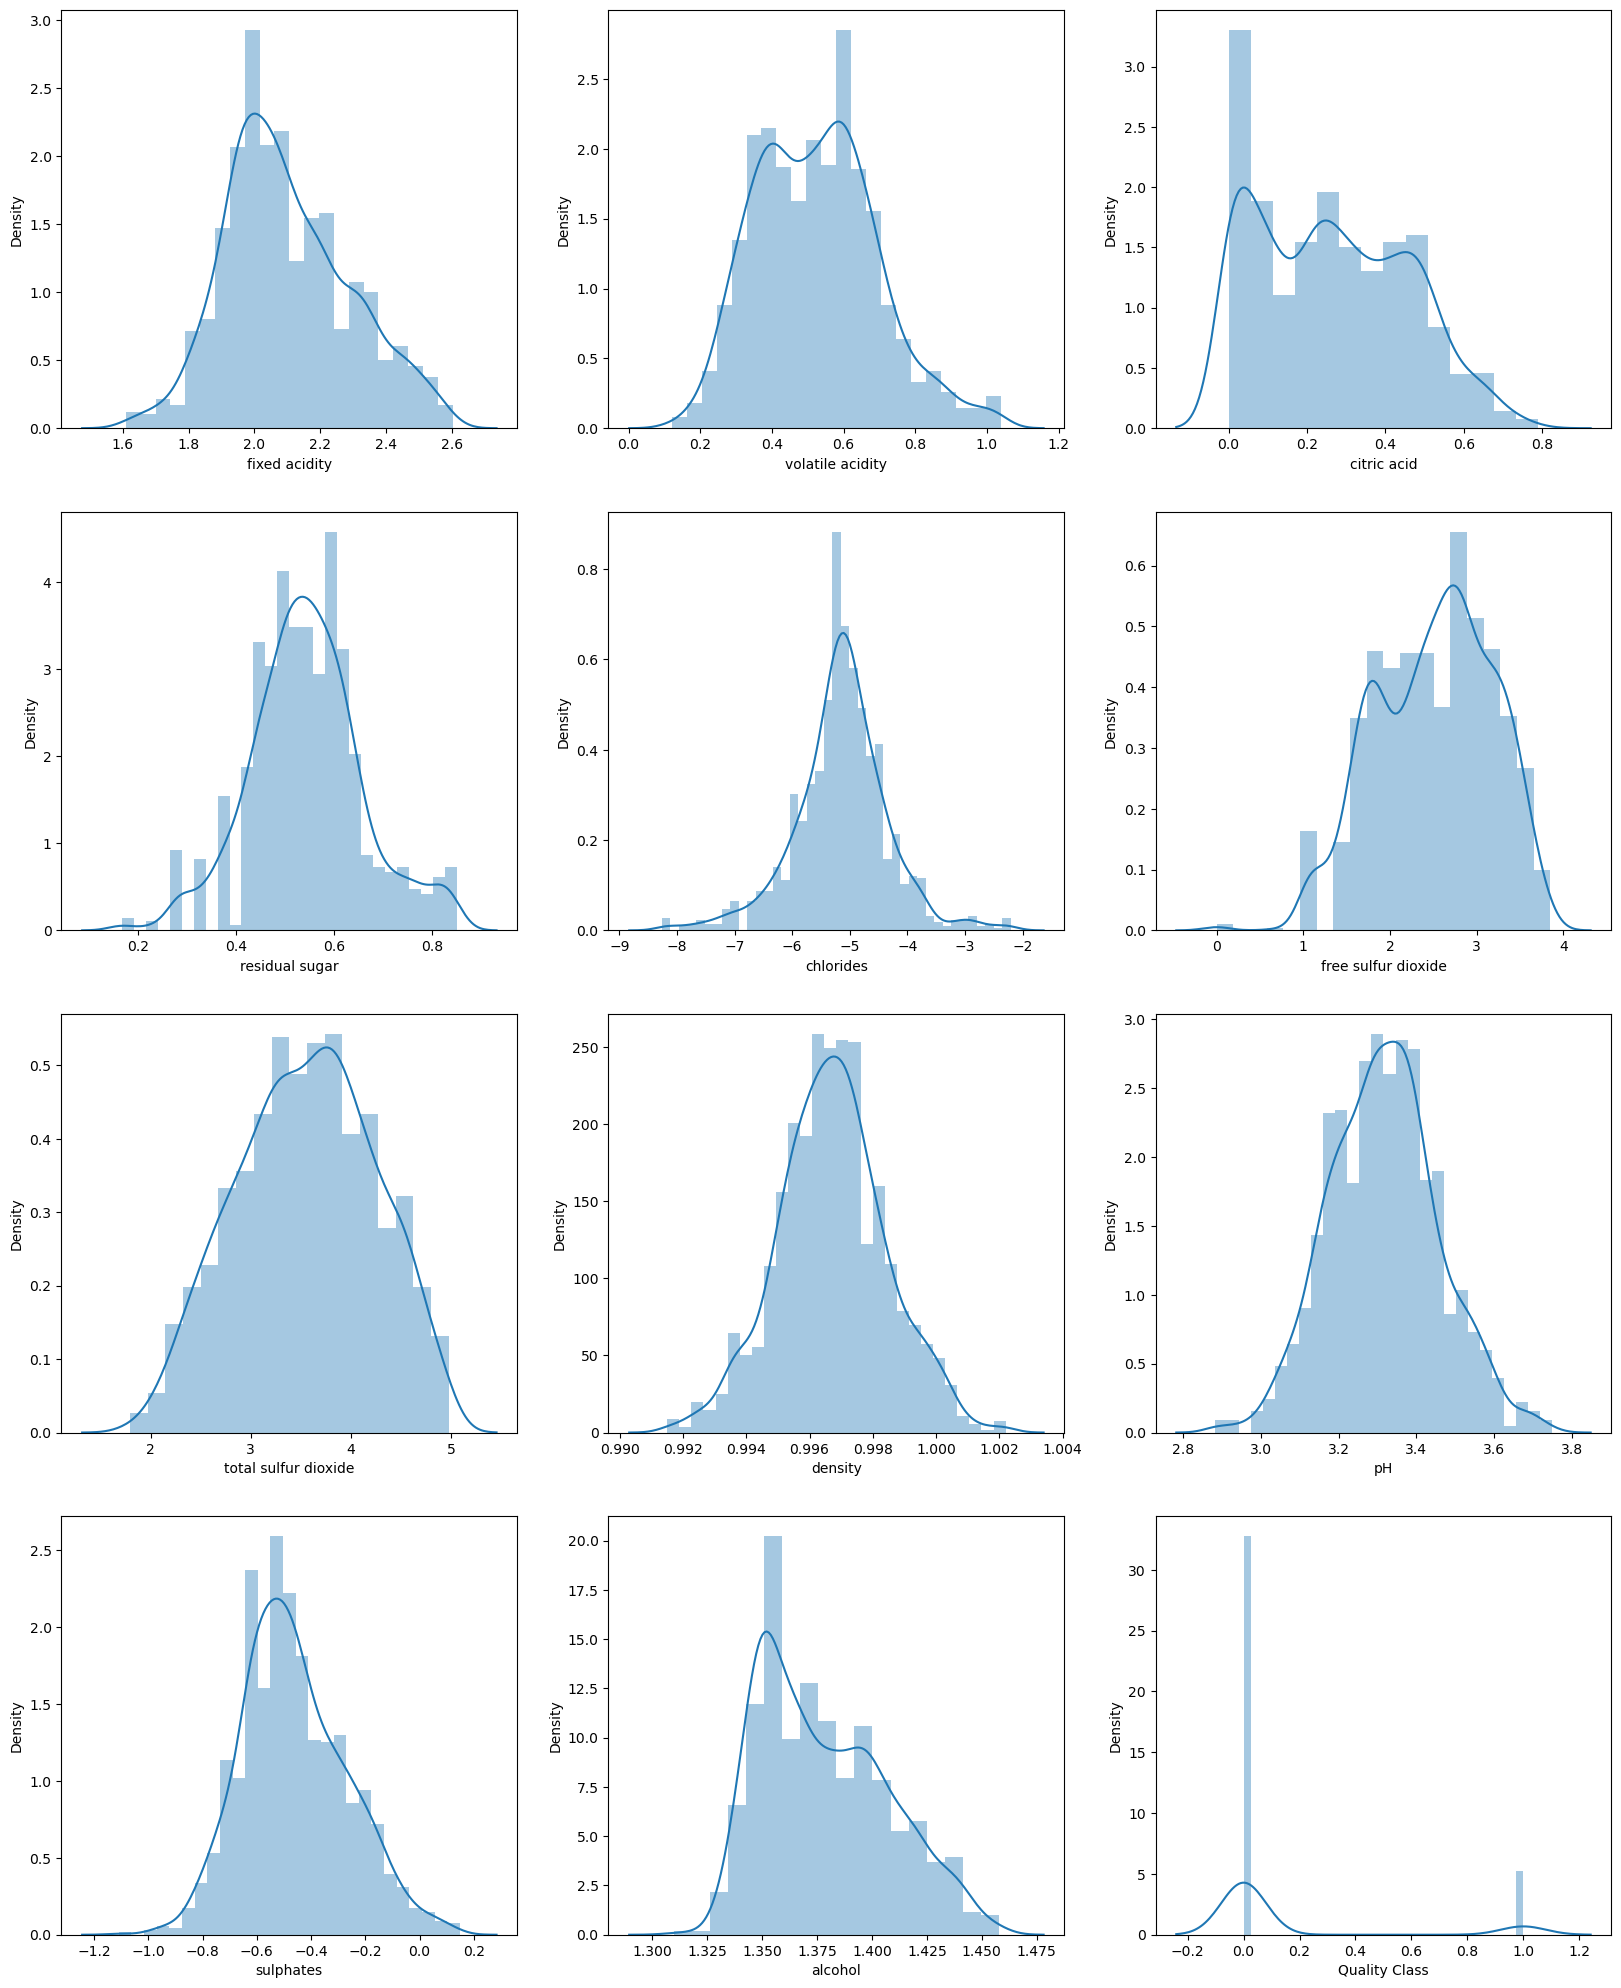

In [170]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df_new:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

# Checking Variance Inflation Factor (VIF)

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_new2=df_new.copy()
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values,i) for i in range(df_new2.shape[1])]
vif['Features']= df_new2.columns
vif

,vif,Features
0,438.548030,fixed acidity
1,19.154557,volatile acidity
2,8.924413,citric acid
3,28.228238,residual sugar
4,50.847679,chlorides
5,43.111998,free sulfur dioxide
6,89.150536,total sulfur dioxide
7,5749.315171,density
8,1309.140274,pH
9,8.733061,sulphates


In [177]:
df_new2= df_new2.drop(['density','pH'], axis=1)

In [178]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values,i) for i in range(df_new2.shape[1])]
vif['Features']= df_new2.columns
vif

,vif,Features
0,221.761299,fixed acidity
1,19.013857,volatile acidity
2,8.261869,citric acid
3,27.170221,residual sugar
4,50.520413,chlorides
5,41.606170,free sulfur dioxide
6,76.519033,total sulfur dioxide
7,8.227630,sulphates
8,333.721403,alcohol
9,1.452193,Quality Class


 ## Separating features and label

In [179]:
x=df_new.drop("Quality Class",axis=1)
y=df_new["Quality Class"]

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (1458, 11)
Label Dimension (1458,)


# Modelling
### Finding the best random state

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
 

#### Creating train test Split

In [187]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Max r2 score : ",maxAccu , " on Random state ",maxRS)

Max r2 score :  0.5399367101719956  on Random state  97


In [198]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print("LR",pred_LR)
print("R2_Score : ",r2_score(y_test,pred_LR))
print("R2_score on training Data : ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error : ",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_LR)))


LR [ 0.372513   -0.02417951  0.03050215  0.20944237 -0.09560084  0.31509121
  0.30642039  0.07371295  0.020733    0.08630429  0.01981715  0.44090706
  0.38713712  0.11238016  0.57057082 -0.10321926  0.16805288 -0.09810782
  0.01982623  0.29606037  0.27863661  0.16100435 -0.08432345  0.08293455
  0.17827601 -0.11127225  0.17624514 -0.00786801  0.38891571  0.01230332]
R2_Score :  0.38530231623023814
R2_score on training Data :  26.12506123048667
Mean Absolute Error :  0.2076722152104241
Mean Squared Error :  0.0853746783013558
Root Mean Squared Error :  0.29218945617759


In [194]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("GBR",pred_LR)
print("R2_Score : ",r2_score(y_test,pred_GBR))
print("R2_score on training Data : ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error : ",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_GBR)))

GBR [ 0.372513   -0.02417951  0.03050215  0.20944237 -0.09560084  0.31509121
  0.30642039  0.07371295  0.020733    0.08630429  0.01981715  0.44090706
  0.38713712  0.11238016  0.57057082 -0.10321926  0.16805288 -0.09810782
  0.01982623  0.29606037  0.27863661  0.16100435 -0.08432345  0.08293455
  0.17827601 -0.11127225  0.17624514 -0.00786801  0.38891571  0.01230332]
R2_Score :  0.4632823479821684
R2_score on training Data :  65.26852848797881
Mean Absolute Error :  0.16093398237920012
Mean Squared Error :  0.07454411833580994
Root Mean Squared Error :  0.27302768785566406


In [193]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("RFR",pred_LR)
print("R2_Score : ",r2_score(y_test,pred_RFR))
print("R2_score on training Data : ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error : ",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_RFR)))

RFR [ 0.372513   -0.02417951  0.03050215  0.20944237 -0.09560084  0.31509121
  0.30642039  0.07371295  0.020733    0.08630429  0.01981715  0.44090706
  0.38713712  0.11238016  0.57057082 -0.10321926  0.16805288 -0.09810782
  0.01982623  0.29606037  0.27863661  0.16100435 -0.08432345  0.08293455
  0.17827601 -0.11127225  0.17624514 -0.00786801  0.38891571  0.01230332]
R2_Score :  0.508432
R2_score on training Data :  92.71925324675325
Mean Absolute Error :  0.132
Mean Squared Error :  0.06827333333333334
Root Mean Squared Error :  0.26129166334449583


In [192]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("KNN",pred_LR)
print("R2_Score : ",r2_score(y_test,pred_knn))
print("R2_score on training Data : ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_knn))
print("Mean Squared Error : ",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_knn)))

KNN [ 0.372513   -0.02417951  0.03050215  0.20944237 -0.09560084  0.31509121
  0.30642039  0.07371295  0.020733    0.08630429  0.01981715  0.44090706
  0.38713712  0.11238016  0.57057082 -0.10321926  0.16805288 -0.09810782
  0.01982623  0.29606037  0.27863661  0.16100435 -0.08432345  0.08293455
  0.17827601 -0.11127225  0.17624514 -0.00786801  0.38891571  0.01230332]
R2_Score :  0.5199999999999999
R2_score on training Data :  26.07838589981448
Mean Absolute Error :  0.06666666666666667
Mean Squared Error :  0.06666666666666667
Root Mean Squared Error :  0.2581988897471611


In [203]:
svr=SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("SVR",pred_SVR)
print("R2_Score : ",r2_score(y_test,pred_SVR))
print("R2_score on training Data : ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_SVR))
print("Mean Squared Error : ",mean_squared_error(y_test,pred_SVR))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_SVR)))

SVR [-5.82121140e-02  4.83449160e-02  2.04960599e-02  8.12364108e-03
 -1.50859380e-02  1.84566857e-01  8.02368748e-02 -7.32618946e-05
  3.87210817e-02  5.09719129e-02  2.58097942e-02  9.41662508e-01
  3.42653089e-01  3.32967130e-02  1.16659887e+00  1.00298235e-01
  6.45609348e-02  2.76520426e-02 -1.87979890e-02  8.30225399e-01
  1.47053230e-01 -8.62801914e-02 -7.83429881e-02 -9.09780837e-02
 -4.54115573e-02  3.31918929e-02 -9.99744246e-02  8.11668375e-02
  3.59287726e-01  3.75168110e-02]
R2_Score :  0.6175601859497214
R2_score on training Data :  56.91771226544662
Mean Absolute Error :  0.12420120766914562
Mean Squared Error :  0.05311664084031646
Root Mean Squared Error :  0.23047047715557076


In [206]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("ETR",pred_etr)
print("R2_Score : ",r2_score(y_test,pred_etr))
print("R2_score on training Data : ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error : ",mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error : ",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_etr)))

ETR [0.26 0.   0.   0.05 0.   0.34 0.13 0.   0.01 0.09 0.   0.62 0.43 0.04
 0.79 0.   0.14 0.   0.   0.97 0.18 0.   0.   0.03 0.   0.   0.   0.
 0.24 0.  ]
R2_Score :  0.6214719999999998
R2_score on training Data :  100.0
Mean Absolute Error :  0.11466666666666668
Mean Squared Error :  0.05257333333333335
Root Mean Squared Error :  0.22928875535737323


In [207]:
from sklearn.model_selection import cross_val_score

In [208]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and Cross validation score - ",(r2_score(y_test,pred_LR)-score.mean())*100)

[ 0.12466362  0.2591582   0.3269678   0.25153971 -0.01075535]
0.19031479435189833
Difference between R2 Score and Cross validation score -  19.498752187833983


In [209]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 Score and Cross validation score - ",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.20252898 0.24813249 0.40845806 0.26417153 0.07119321]
0.23889685507266764
Difference between R2 Score and Cross validation score -  26.953514492733234


In [210]:
score2=cross_val_score(GBR,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 Score and Cross validation score - ",(r2_score(y_test,pred_GBR)-score2.mean())*100)

[ 0.19454337  0.20446296  0.33670432  0.24659702 -0.01284411]
0.19389271418288215
Difference between R2 Score and Cross validation score -  26.938963379928627


In [213]:
score3=cross_val_score(knn,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 Score and Cross validation score - ",(r2_score(y_test,pred_knn)-score3.mean())*-100)

[0.8630137  0.83561644 0.89726027 0.78694158 0.86597938]
0.8497622746316434
Difference between R2 Score and Cross validation score -  32.976227463164356


# Final Model

In [214]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='sqrt')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.9333333333333333


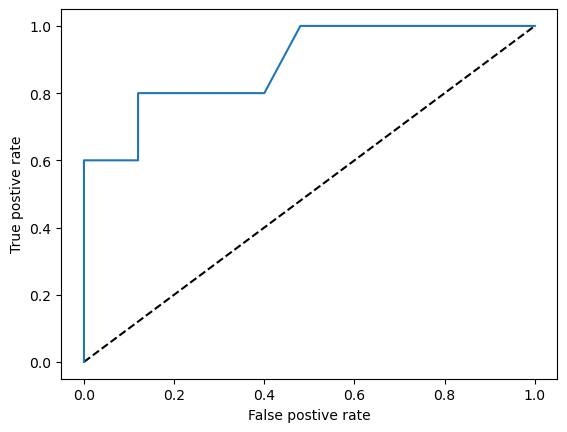

Auc Score :
 0.8


In [216]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_mod.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [217]:
import joblib
joblib.dump(Final_mod,'Red_Wine_Quality_Final.pkl')

['Red_Wine_Quality_Final.pkl']